Last updated: 06-May-2020

## Competetion Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Acknowledgments

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [43]:
#importing the required libraries - generic

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

my_colors = list('rgbkymc')

In [4]:
data = pd.read_csv('Ames_train.csv')
data.shape

(1460, 81)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [24]:
#Missing values

missing_features_df = pd.DataFrame({'ColType': data.dtypes,
                                    'MissingCnt': data.isnull().sum(),
                                    'MissingPct': data.isnull().sum() / len(data) * 100 }) \
                                    .sort_values(by = 'MissingPct', ascending=False)
    
missing_features_df[missing_features_df['MissingCnt'] > 0]

,ColType,MissingCnt,MissingPct
PoolQC,object,1453,99.520548
MiscFeature,object,1406,96.301370
Alley,object,1369,93.767123
Fence,object,1179,80.753425
FireplaceQu,object,690,47.260274
LotFrontage,float64,259,17.739726
GarageYrBlt,float64,81,5.547945
GarageCond,object,81,5.547945
GarageType,object,81,5.547945
GarageFinish,object,81,5.547945


In [17]:
feat_na = missing_features_df[missing_features_df['MissingCnt'] > 0].index
print(feat_na, sep='')

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')


### Let's find the relation of SalePrice to missing values

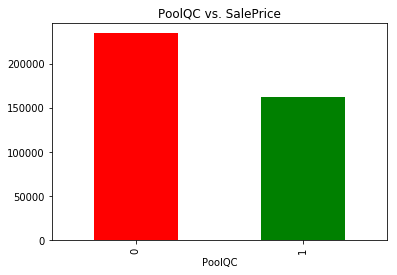

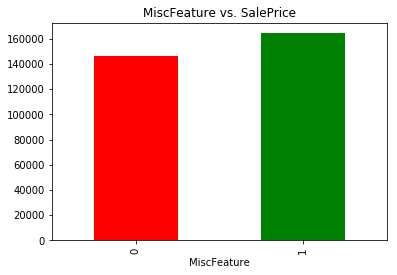

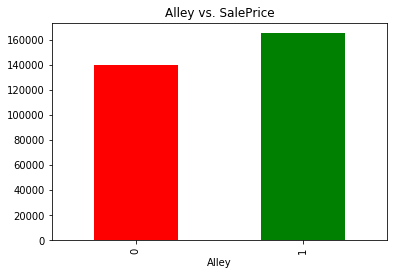

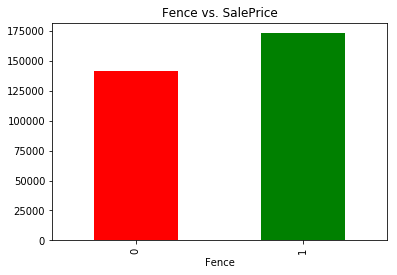

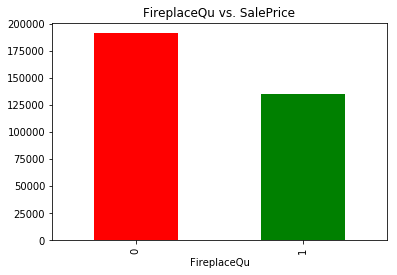

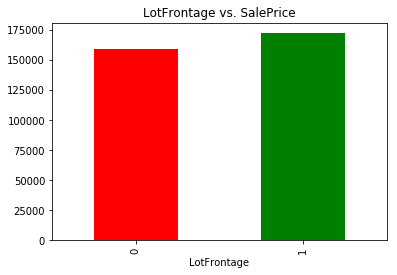

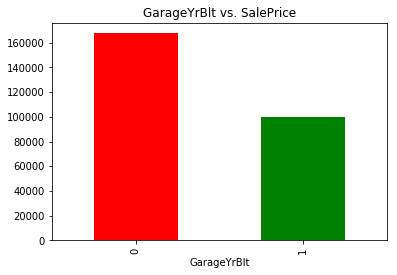

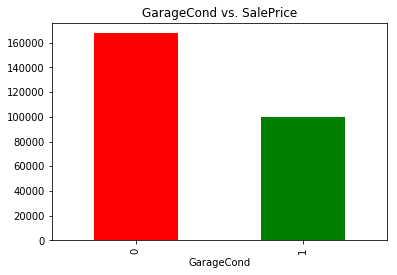

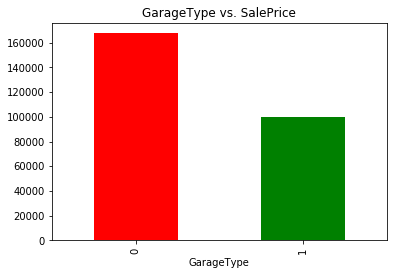

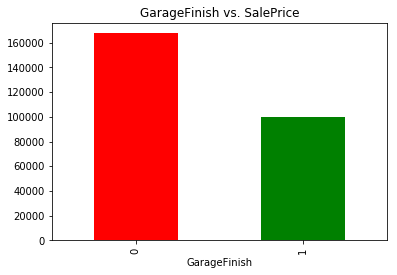

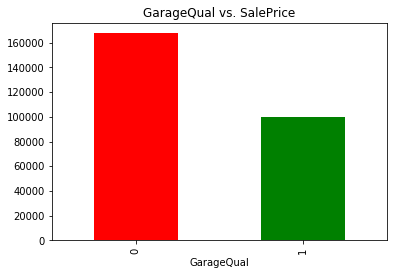

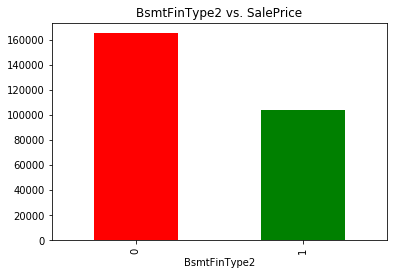

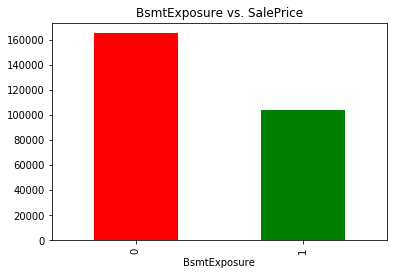

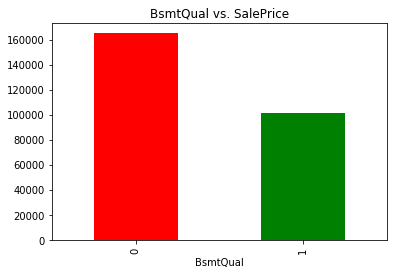

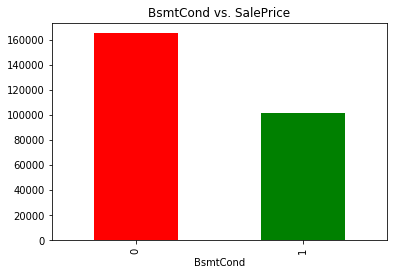

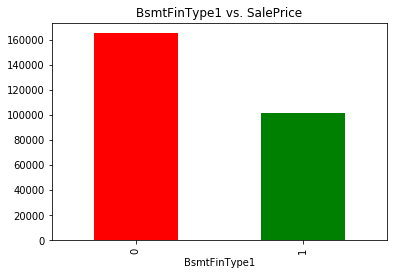

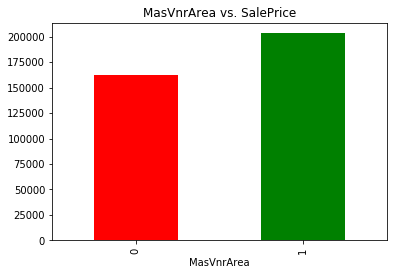

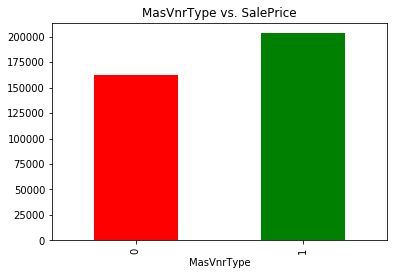

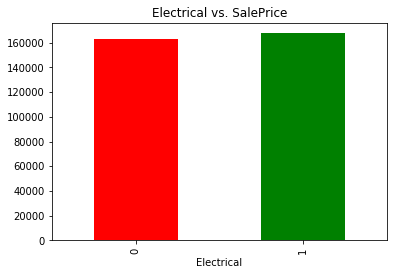

In [31]:
for feature in feat_na:
    
    data1 = data.copy()
    
    #converting all null values to 1
    data1[feature] = np.where(data1[feature].isnull(), 1, 0)
    
    #let's check the mean of sale price for each missing feature to see if they differ for missing and not missing
    data1.groupby(feature)['SalePrice'].median().plot.bar(color=list('rgbymck'))
    plt.title(feature + ' vs. SalePrice')
    plt.show()    
    

SalePrice for houses with no pool is considerably less 150K vs 240K for regular houses

### Numerical Features

In [33]:
numerical_features = [col for col in data.columns if data[col].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### DataTime variable are not 'numerical', they can be replaced with real numerics like no. of years (feat engg)

In [37]:
year_feature = [f for f in numerical_features if 'Year' in f or 'Yr' in f]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

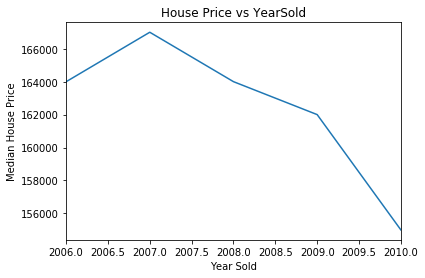

In [38]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

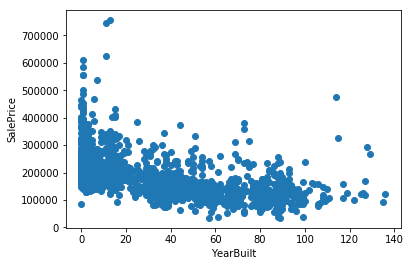

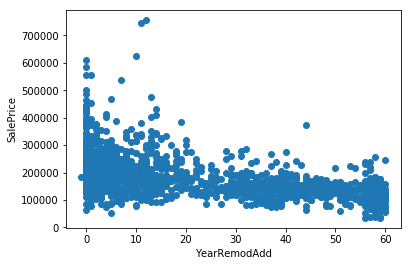

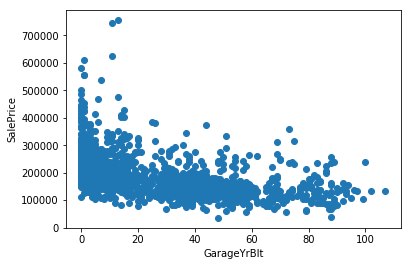

In [39]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data1=data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data1[feature]=data1['YrSold']-data1[feature]

        plt.scatter(data1[feature],data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        
        plt.show()  
    

Expectedly as the age of house increases, the SalePrice is falling

### Discrete and Continuous Numericals

In [45]:
## Numerical variables are usually of 2 type
## 1. Continous variable (SqFt) and Discrete Variables (FullBath)

discrete_feature=[feature for feature in numerical_features 
                  if data[feature].nunique() <= 25 and feature not in year_feature + ['Id']]

print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [46]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


### Lets see how SalePrice varies wrt to Discrete numerical features

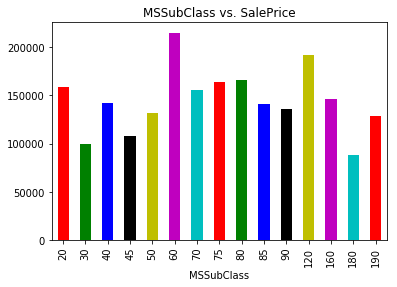

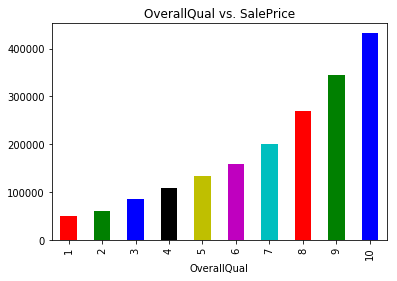

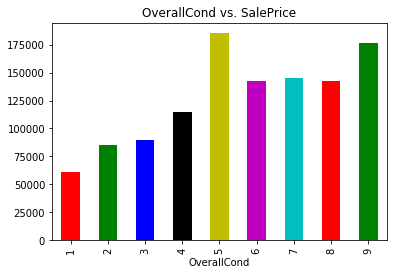

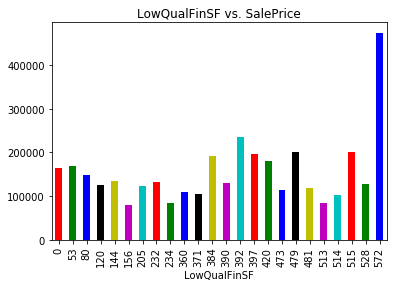

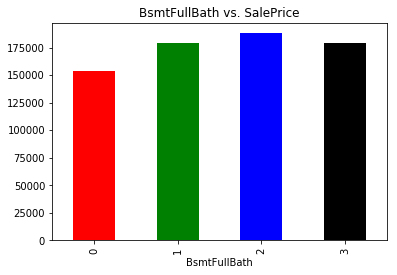

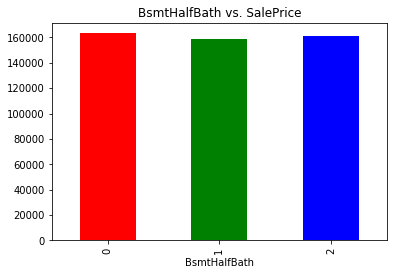

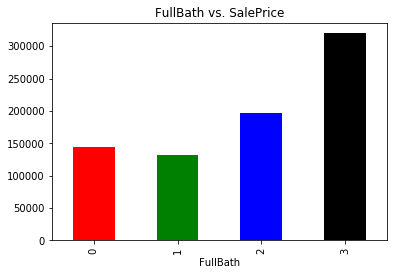

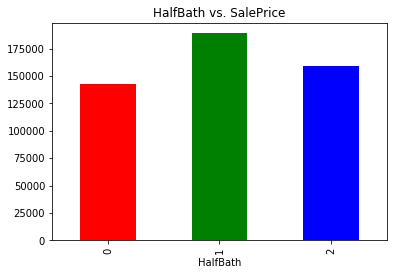

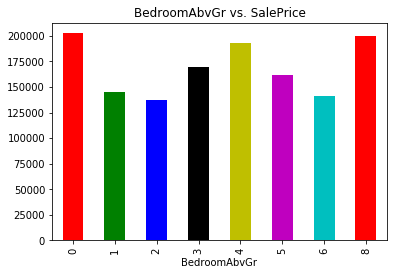

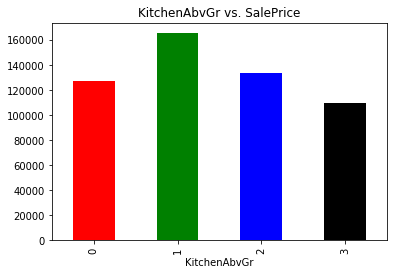

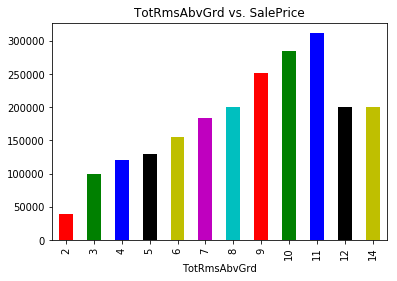

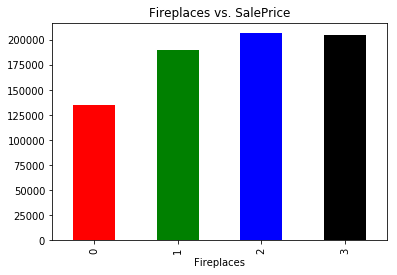

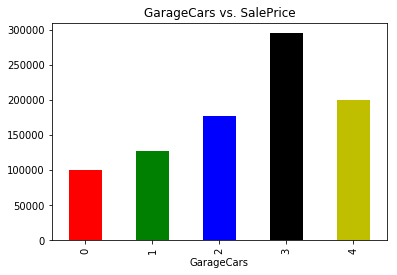

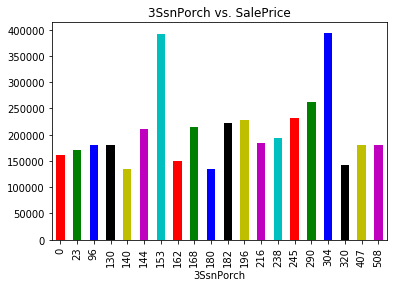

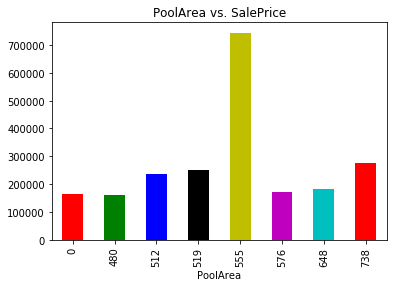

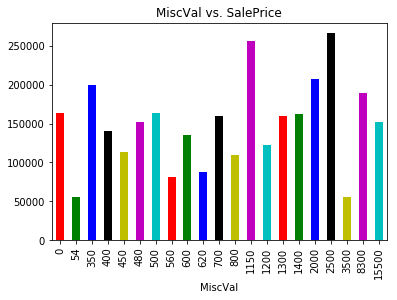

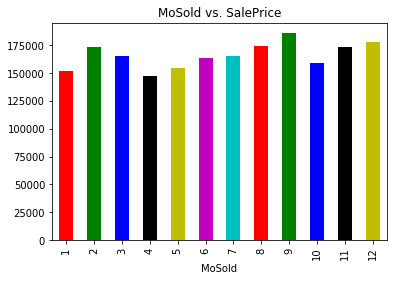

In [47]:
for feature in discrete_feature:
    
    data1 = data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar(color=my_colors)
    
    plt.xlabel(feature)
    plt.title(feature + ' vs. SalePrice')
    plt.show()

### Continuous Numeric Variable and analyzing their distrubution

In [48]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']]
print('No. of continuous features: %d' %len(continuous_features))

No. of continuous features: 16


In [50]:
data[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


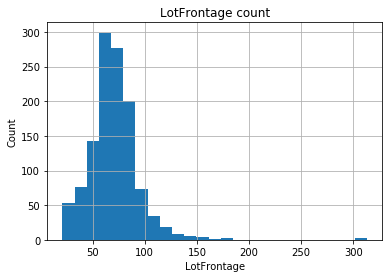

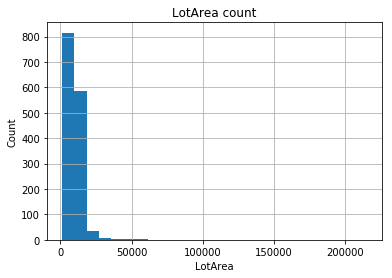

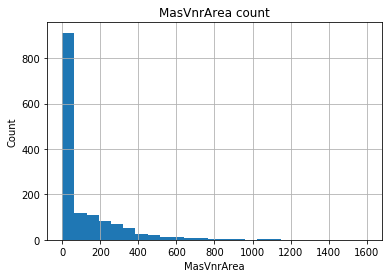

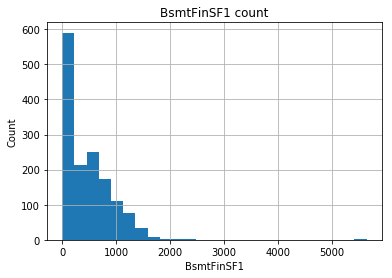

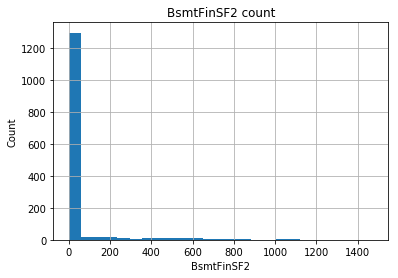

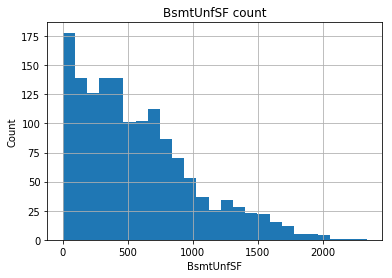

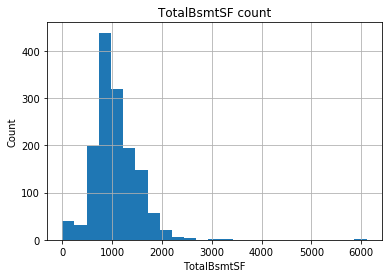

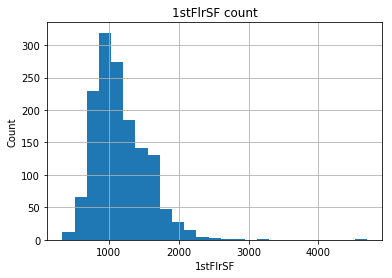

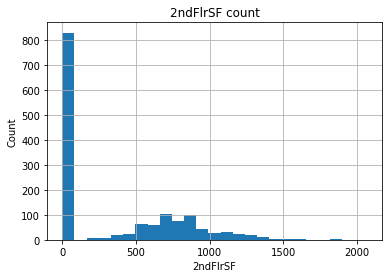

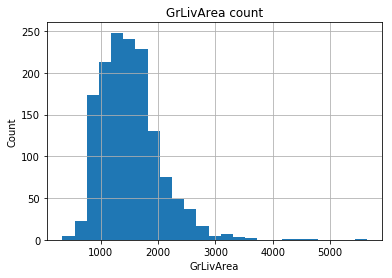

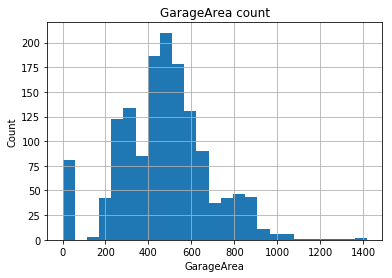

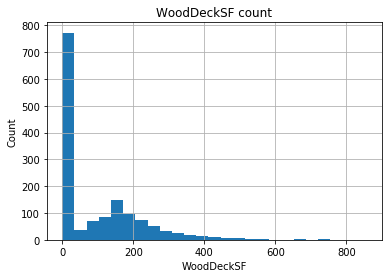

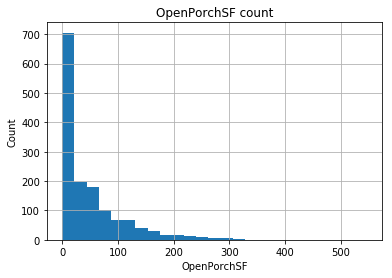

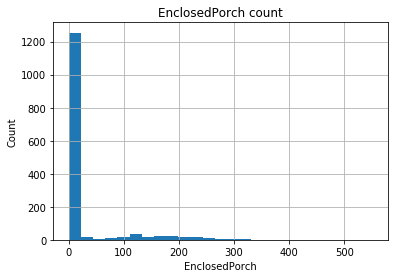

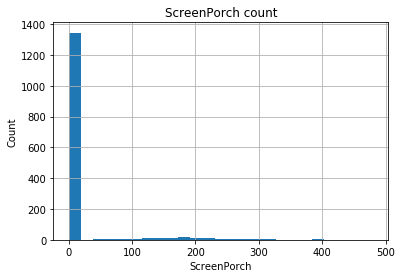

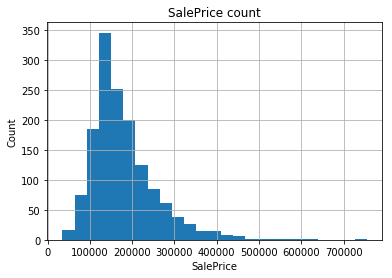

In [49]:
for feature in continuous_features:
    
    data1 = data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature + ' count')
    plt.show()

https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

### Transforming the skewed data

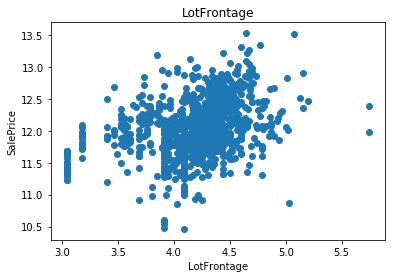

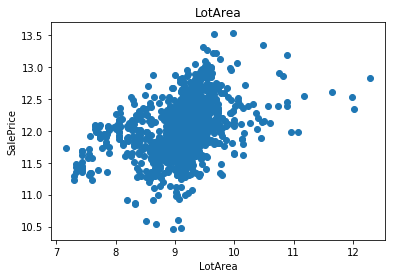

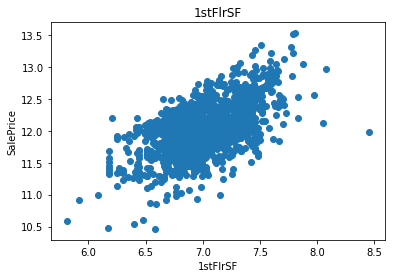

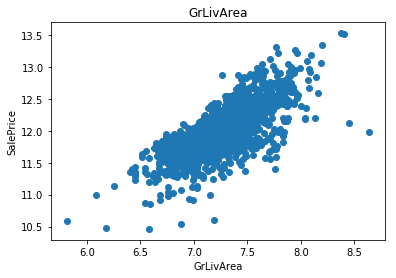

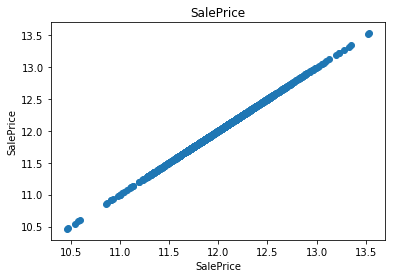

In [51]:
for feature in continuous_features:
    
    data1 = data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data1[feature])
        data1['SalePrice'] = np.log(data['SalePrice'])        
        plt.scatter(data1[feature], data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

### Outliers (Exist only for continuous numerical features)

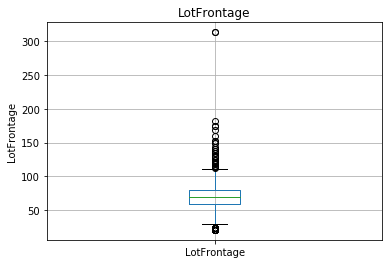

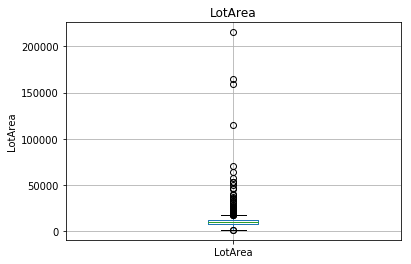

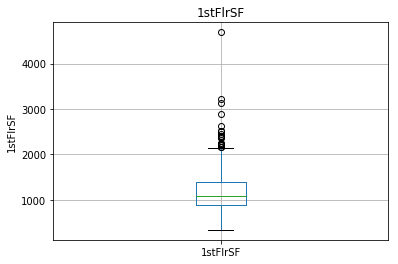

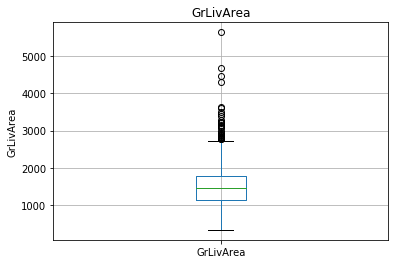

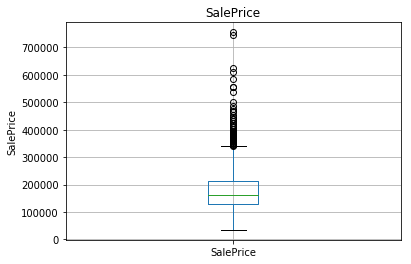

In [52]:
for feature in continuous_features:
    data1 = data.copy()
    
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature] = np.log(data1[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Features

In [53]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('No. of categorical features: {}'.format(len(categorical_features)))

No. of categorical features: 43


In [54]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [67]:
temp = []

for feature in categorical_features:
    temp.append(
        {'Feature': feature,
         'Count': data[feature].nunique()           
        })

temp 

[{'Feature': 'MSZoning', 'Count': 5},
 {'Feature': 'Street', 'Count': 2},
 {'Feature': 'Alley', 'Count': 2},
 {'Feature': 'LotShape', 'Count': 4},
 {'Feature': 'LandContour', 'Count': 4},
 {'Feature': 'Utilities', 'Count': 2},
 {'Feature': 'LotConfig', 'Count': 5},
 {'Feature': 'LandSlope', 'Count': 3},
 {'Feature': 'Neighborhood', 'Count': 25},
 {'Feature': 'Condition1', 'Count': 9},
 {'Feature': 'Condition2', 'Count': 8},
 {'Feature': 'BldgType', 'Count': 5},
 {'Feature': 'HouseStyle', 'Count': 8},
 {'Feature': 'RoofStyle', 'Count': 6},
 {'Feature': 'RoofMatl', 'Count': 8},
 {'Feature': 'Exterior1st', 'Count': 15},
 {'Feature': 'Exterior2nd', 'Count': 16},
 {'Feature': 'MasVnrType', 'Count': 4},
 {'Feature': 'ExterQual', 'Count': 4},
 {'Feature': 'ExterCond', 'Count': 5},
 {'Feature': 'Foundation', 'Count': 6},
 {'Feature': 'BsmtQual', 'Count': 4},
 {'Feature': 'BsmtCond', 'Count': 4},
 {'Feature': 'BsmtExposure', 'Count': 4},
 {'Feature': 'BsmtFinType1', 'Count': 6},
 {'Feature': 'B

In [69]:
category_count = pd.DataFrame(temp).sort_values(by='Count', ascending=False).set_index('Feature')
category_count

,Count
Feature,
Neighborhood,25
Exterior2nd,16
Exterior1st,15
SaleType,9
Condition1,9
Condition2,8
HouseStyle,8
RoofMatl,8
Functional,7
